In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

C:\Users\Sciddhanto\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# We will be using amazon share price data which can be downloaded from YAHOO finance website.
df = pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,15.315000,15.5120,15.131500,15.337500,15.337500,58406000
1,2015-01-28,15.490500,15.5755,15.190000,15.195500,15.195500,61276000
2,2015-01-29,15.236500,15.6400,14.966500,15.589000,15.589000,173132000
3,2015-01-30,17.316000,17.9750,17.037001,17.726500,17.726500,477122000
4,2015-02-02,17.502501,18.2500,17.500500,18.223499,18.223499,204638000


In [5]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]

df.head()

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


In [6]:
# split data frame into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()


In [7]:
# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)


18:39:10 - cmdstanpy - INFO - Chain [1] start processing
18:39:11 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
forecast = model.predict(df_test)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2023-07-20,108.141641,-122.121620,371.382452,-127.307251,363.993175,7.246776,7.246776,7.246776,1.294472,1.294472,1.294472,5.952304,5.952304,5.952304,0.0,0.0,0.0,115.388417
1007,2023-07-21,108.154157,-121.565365,371.288414,-127.607992,364.411627,7.125836,7.125836,7.125836,1.138373,1.138373,1.138373,5.987463,5.987463,5.987463,0.0,0.0,0.0,115.279993
1008,2023-07-24,108.191704,-120.357928,371.279739,-127.883702,364.855110,7.065573,7.065573,7.065573,1.060789,1.060789,1.060789,6.004784,6.004784,6.004784,0.0,0.0,0.0,115.257277
1009,2023-07-25,108.204219,-121.949413,370.921406,-128.111196,365.273562,7.270404,7.270404,7.270404,1.287077,1.287077,1.287077,5.983326,5.983326,5.983326,0.0,0.0,0.0,115.474623
1010,2023-07-26,108.216735,-122.847248,372.278134,-128.283370,365.490508,7.252485,7.252485,7.252485,1.302474,1.302474,1.302474,5.950011,5.950011,5.950011,0.0,0.0,0.0,115.469220


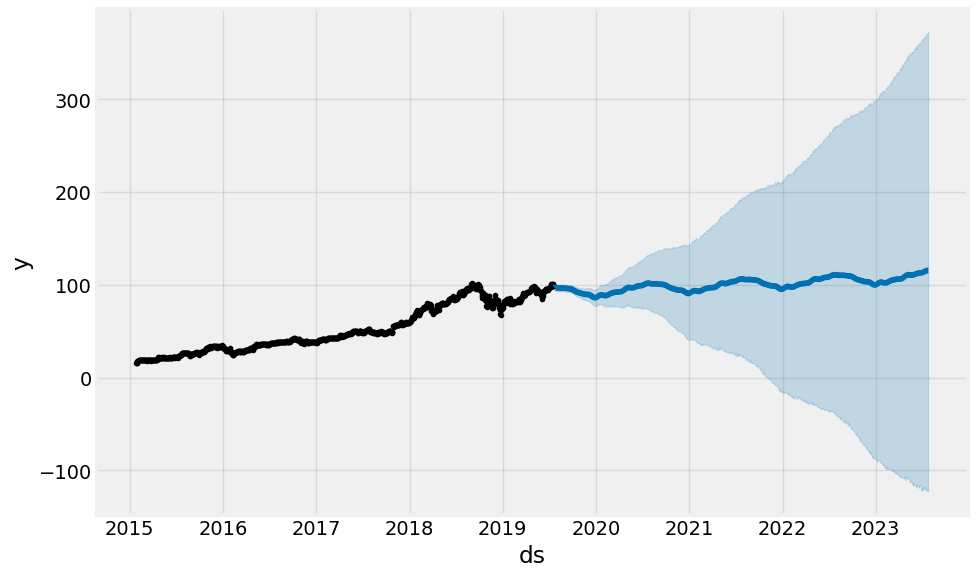

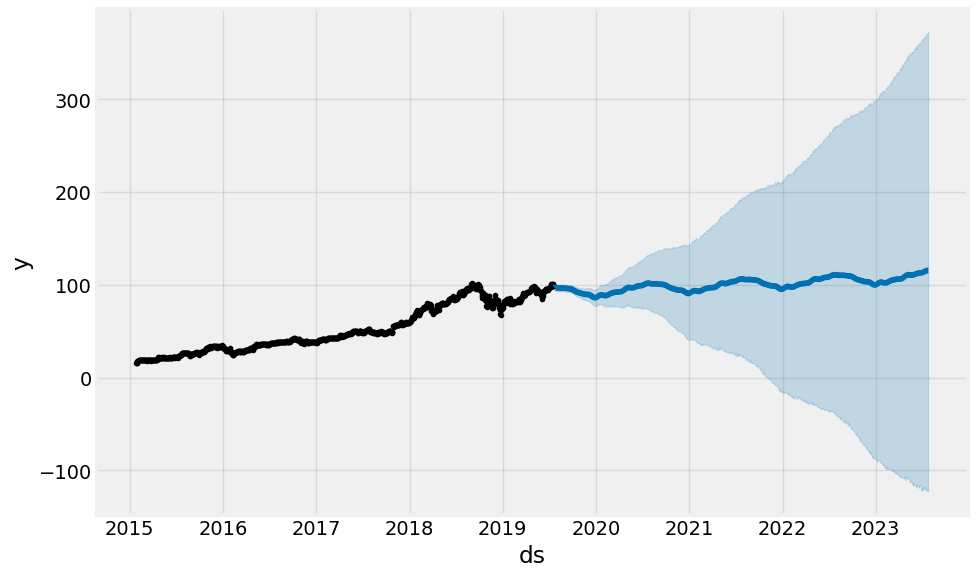

In [9]:
model.plot(forecast)


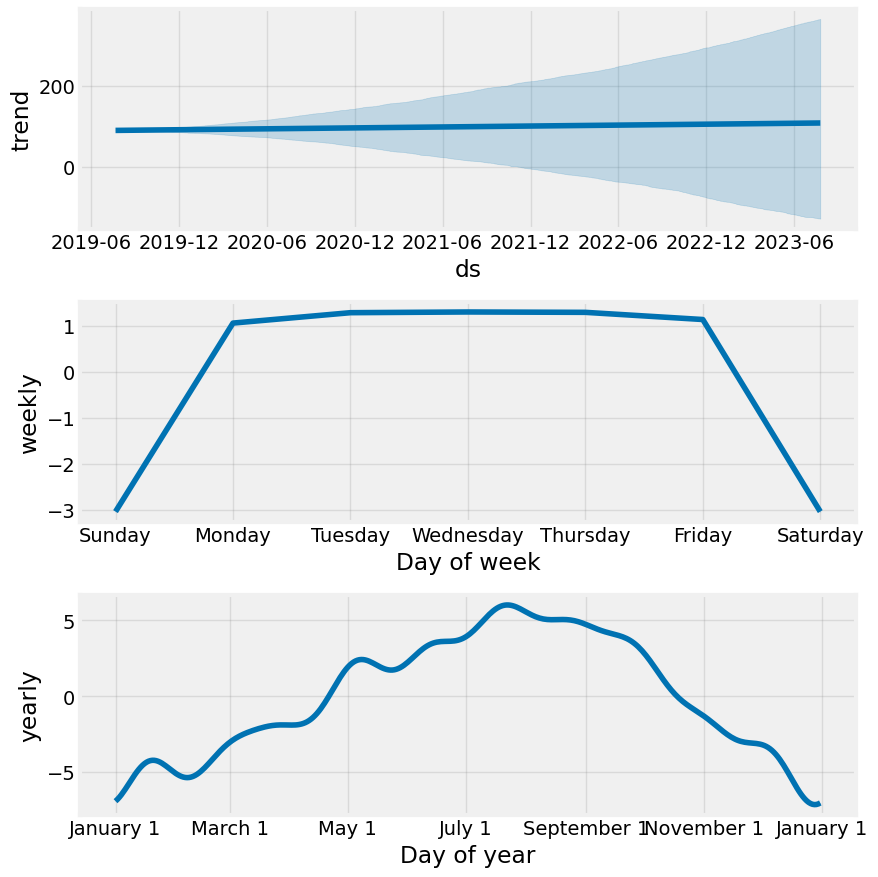

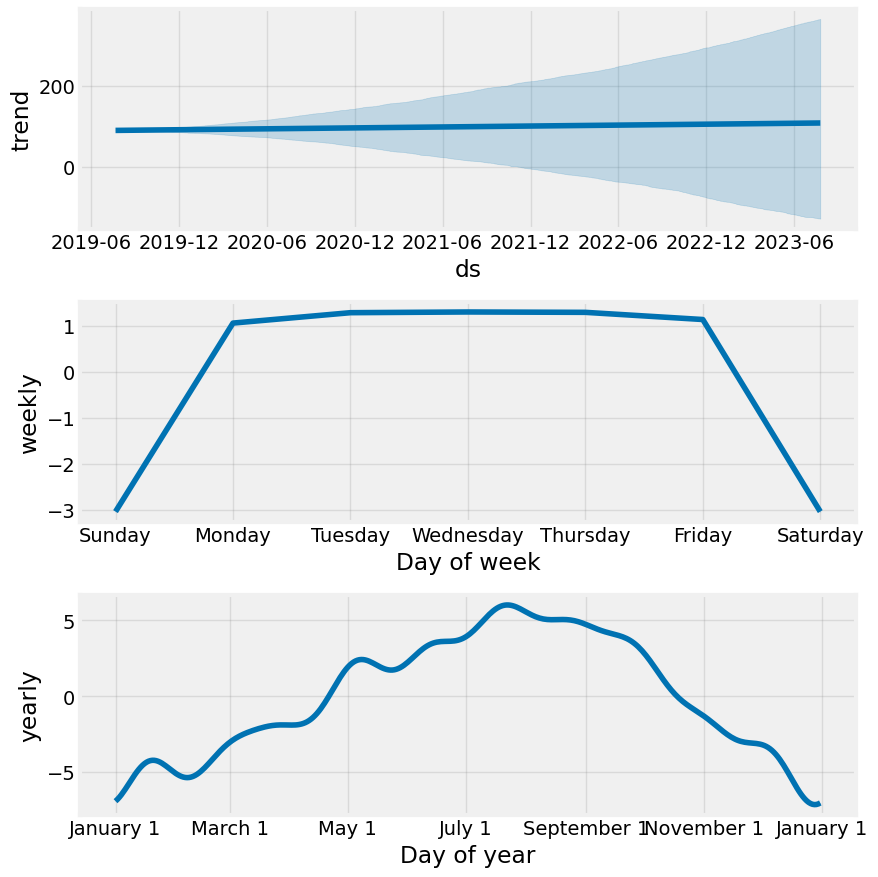

In [10]:
# plot graphs of different components:
model.plot_components(forecast)


In [11]:
# code
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))


Mean Squared Error (MSE): 1953.8895254992644
Mean Absolute Error (MAE): 34.47221966995942


In [12]:
def mean_abs_perc_err(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))


Mean Absolute % Error (MAPE):  22.71283124006329
